## Wczytanie danych

In [132]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/AirQualityUCI.csv", sep=";", decimal=",")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Usuwanie niepotrzebnych kolumn

In [133]:
df = df[:-114]
df = df.drop(columns=["Time", "Date", "Unnamed: 15", "Unnamed: 16"])
df.replace(-200.0, np.nan, inplace=True)
print("Data shape:", df.shape)

Data shape: (9357, 13)


Wstępnie dane mają 13 kolumn i 9357 wierszy

## Czyszczenie danych

In [134]:
df.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Pierwsze co jest zauważalne, to duża liczba wartości brakujących w kolumnie NMHC(GT) (8443 / 9357). Ponieważ wartości pustych jest kilka razy więcej niż rzeczywistych, nie ma sensu coś robić z tą kolumną bo będzie ona sztucznie utworzona. Dlatego usuwam ją

In [135]:
df = df.drop("NMHC(GT)", axis=1)

Kilka kolumn (PT08.S1(CO), C6H6(GT), PT08.S2(NMHC) itp.) mają taką samą liczbę wartości pustych (366), sprawdzam czy to nie są te same wiersze jak w przypadku ostatnich 144 w zbiorze początkowym.

In [136]:
df[df["PT08.S1(CO)"].isna()].drop(["CO(GT)", "NOx(GT)", "NO2(GT)"], axis = 1)

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Faktycznie, tak jest. Usuwam te wiersze, bo wszystkie wartości w nich są puste, a ich liczba jest mała w porównaniu do całego zbioru

In [137]:
df = df.drop(
    df[df["PT08.S1(CO)"].isna()].drop(["CO(GT)", "NOx(GT)", "NO2(GT)"], axis = 1).index
    ).reset_index(drop=True)

Sytuacja z kolumnami CO(GT), NOx(GT), NO2(GT) jest niejednoznaczna. Z jednej strony, liczba wierszy jest zaduża aby usuwać ich ze zbioru (około 20%). Z drugiej, nie możemy usunąć 3 kolumn ze zbioru, ponieważ mają w sobie wartości, które będą wykorzystane do modelowania. Dlatego, odpowiednim sposobem będzie raczej imputacja. Istnieje kilka metod imputacji od prostych, do bardziej złożonych:
- Imputacja wartością stałą
- Imputacja średnią/medianą/percentylami
- Interpolacja
- Imputacja za pomocą metod ML (KNN, Random Forest, Decision Trees)

Ponieważ wypełniania stałą wartością (nie ma różnicy czy średnią czy zerem) zniekształca rozkład zmiennej, robiąc imputowaną wartość dominującą, wybieram KNN imputację, czyli na podstawie podobnych obserwacji ze zbioru.

## Data Leakage

Data Leakage (wyciek danych) – jeden z najczęstszych problemów w projektach ML/DS. Występuje wtedy, gdy informacje ze zbioru testowego zostaną nieświadomie wykorzystane podczas trenowania modelu, np. poprzez wcześniejsze przetwarzanie danych (skalowanie, imputację braków, itp.) na całym zbiorze danych przed podziałem na zbiór treningowy i testowy. To prowadzi do zawyżonych wyników na etapie walidacji i sprawia, że model gorzej generalizuje do nowych, rzeczywistych danych.

## Train / Val / Test split

Aby uniknąć wycieku danych podzielę zbiór danych do jakichkolwiek przekształceń. W celu uzyskanie bardziej obiektywnej oceny w ewaluacji modelu, tworzę 3 zbiory zamiast 2 standardowych (drugi najczęstszy problem w projektach), ponieważ zbudowanie dobrego modelu uczenia maszynowego to pętla, która ma w sobie kilkadziesiąt / kilkaset iteracji. Pod czas tych iteracji, coś zmieniamy w modelu lub danych (np. metodę przetwarzania lub zmiana hyperparametrów modelu) i w ten sposób możemy przeuczyć model na obserwacjach ze zbioru testowego, a z tego wynika zła generalizacja i zła ocena modelu. Dlatego dzielę zbiór na trzy podzbiory:
1. Traning set (do trenowania)(80%) - zbiór wykorzystywany do uczenia modelu (wyznaczania parametrów, pozyskiwania patternów)
2. Validation set (do ewaluacji)(10%) - zbiór wykorzystywany do wyboru najlepszego modelu (tuningu hyperparametrów, porównania modeli)
3. Test set (do końcowej ewaluacji)(10%) - zbiór, który jest odkładany do ostatniego etapu ewaluacji wybranym najlepszym modelem, żadnych zmian w danych/modelu po ewaluacji nie wykonuje się

In [138]:
from sklearn.model_selection import train_test_split

X = df.drop("C6H6(GT)", axis=1)
y = df["C6H6(GT)"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((7192, 11), (899, 11), (900, 11))

Po podzieleniu mamy 7192 obserwacje w zbiorze treningowym i po 900 w zbiorach walidacyjnym i testowym

## KNN Imputacja

In [139]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [140]:
X_train_imputed.isna().sum().sum(), X_val_imputed.isna().sum().sum(), X_test_imputed.isna().sum().sum()

(0, 0, 0)

## Kolumny o zerowej wariancji

Kolumny o zerowej wariancji - kolumny w zbiorze, w których wszystkie wartości są identyczne. Jeżeli wartości są jednakowe dla całej kolumny to nie ta kolumna nie wnoszi nowej informacji przy trenowaniu modeli. Sprawdzam czy są takie w zbiorze

In [141]:
zero_var_cols = [col for col in X_train_imputed.columns if X_train_imputed[col].nunique() == 1]
print("Zero variance columns:", zero_var_cols)

Zero variance columns: []


Nie ma kolumn o zerowej wariancji

## Wartości odstające

Identyfikuję wartości odstające za pomocą wykresów pudełkowych

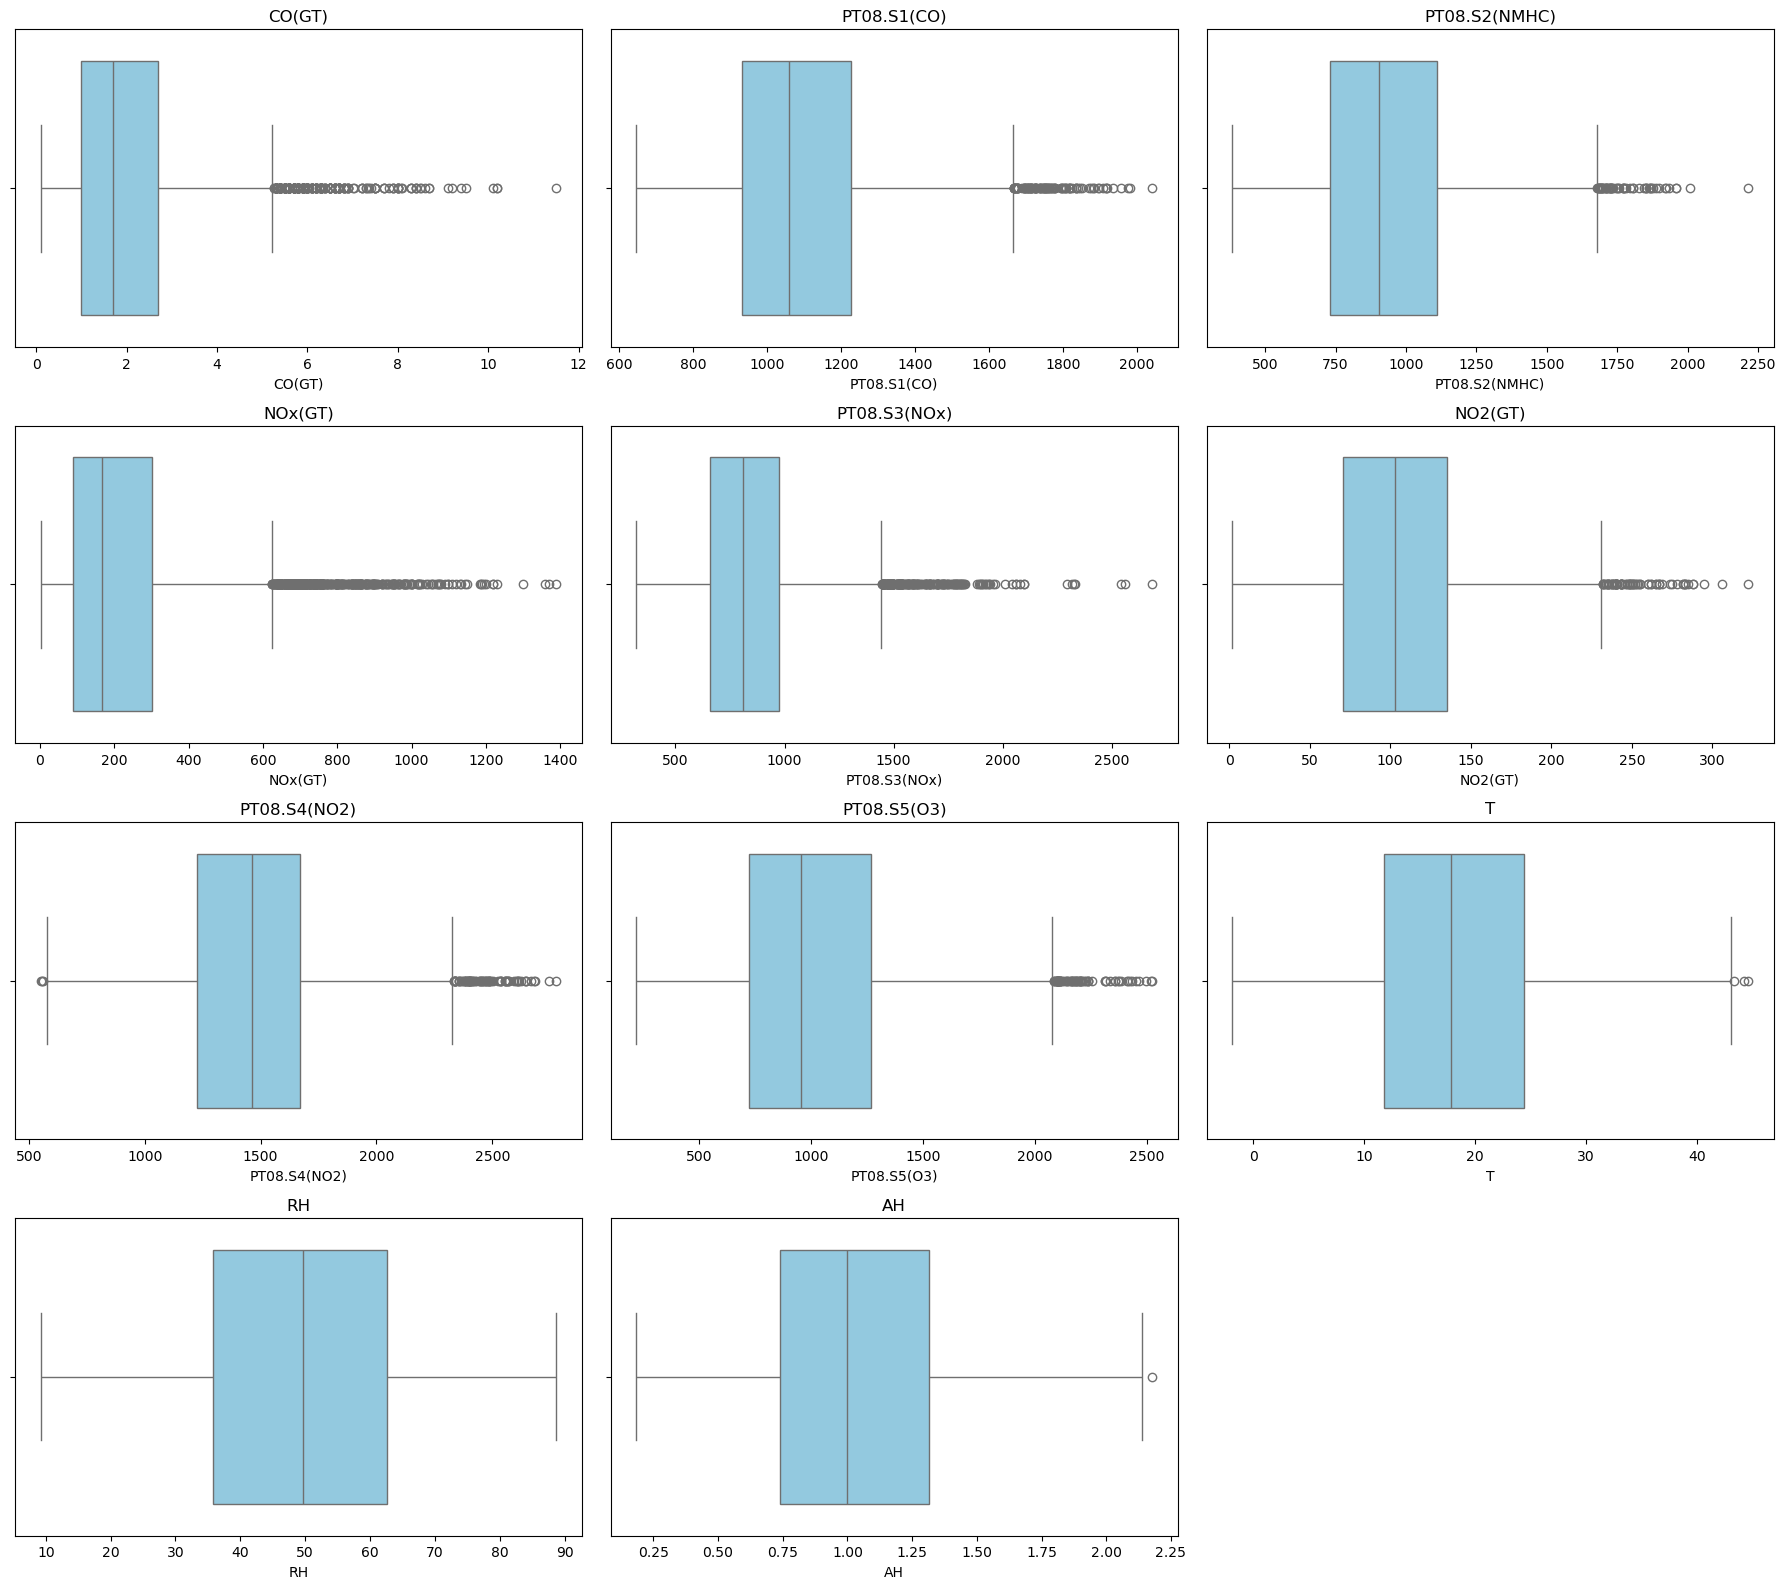

In [142]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = X_train_imputed.columns
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=X_train_imputed[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Boxploty pokazują, że są wartości odstające we wszystkich kolumnach oprócz RH, ale nie widać dokładnie ile ich jest

### Metoda IQR

Do wyznaczania wartości odstających korzystam z metody IQR (interquartile range) czyli rozstępu międzykwartylowego. Metoda ta nie jest zależna od rozkładu cechy (jak np. z-score method), a więc bez sprawdzania histogramów obliczam róznicę między trzecim a pierwszym kwartylami i obliczam outliery poza dolną i górną granicami. Dolna i górna granice są zdefiniowane jako Q1 - 1.5 * IQR i Q3 + 1.5 * IQR odpowiednio.

In [143]:
numeric_cols = X_train_imputed.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

outliers_per_column = is_outlier.sum()
print("Liczba outlierów w zbiorze treningowym:\n\n", outliers_per_column)

total_outliers = is_outlier.sum().sum()
rows_w_outliers = len(X_train_imputed[is_outlier.any(axis=1)])

print(f"\nŁącznie {total_outliers} wartości odstających w {rows_w_outliers} wierszach.")

Liczba outlierów w zbiorze treningowym:

 CO(GT)           248
PT08.S1(CO)      100
PT08.S2(NMHC)     58
NOx(GT)          399
PT08.S3(NOx)     195
NO2(GT)           75
PT08.S4(NO2)      83
PT08.S5(O3)       69
T                  3
RH                 0
AH                 1
dtype: int64

Łącznie 1231 wartości odstających w 735 wierszach.


Sytuacja z wartościami odstającymi jest rózna dla każdej kolumny i niejednoznaczna dla całego zbioru. Mianowicie, w kolumnach `CO(GT)`, `NOx(GT)` oraz `PT08.S3(NOx)` jest duża outlierów, natomiast w kolumnach `T`, `RH`, `AH` - mała, w pozostalych - średnio. Łącznie wartości odstające są w 735 wierszach zbioru treningowego, czyli około 10% całego. 

Metoda obróbki wartości odstających w większości załeży od charakteru danych i celów projektu, najbardziej popularnymi metodami są:

- Nie robić żadnych przekształceń
- Usuwanie wierszów z outlierami
- Obcinanie wartości do dolnej / górnej granicy

Ponieważ końcowym celem jest zbudowanie modelu regresyjnego, a są modele odporne na wartości odstające (XGBoost, DecisionTree, LightGBM itp.) to w celach tego projektu nie będę ani usuwać, ani obcinać wartości odstających. Outliery to nie zawsze jest cós złego i na pewno nie to same co wartości brakujące. Nie mamy dostępnej informacji czy są to błędy czujników, czy realne wartości. Ewentualnie sprawdzam czy wpływają oni na model

In [144]:
X_train_clipped = X_train_imputed.copy()

for col in numeric_cols.columns:
    Q1 = X_train_imputed[col].quantile(0.25)
    Q3 = X_train_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train_clipped[col] = np.clip(X_train_imputed[col], lower_bound, upper_bound)


mask = ~is_outlier.any(axis=1)
X_train_removed_outliers = X_train_imputed[mask]
y_train_removed_outliers = y_train[mask]

In [149]:
def build_and_evaluate(X_train, y_train, X_val, y_val):

    from xgboost import XGBRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred))

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse_xgb, rmse_lr

rmse_imputed, rmse_imputed_lr = build_and_evaluate(X_train_imputed, y_train, X_val_imputed, y_val)
rmse_clipped, rmse_clipped_lr = build_and_evaluate(X_train_clipped, y_train, X_val_imputed, y_val)
rmse_removed_outliers, rmse_removed_outliers_lr = build_and_evaluate(X_train_removed_outliers, y_train_removed_outliers, X_val_imputed, y_val)

print("XGBoost RMSE (odporny na outliers):")
print(f"RMSE for data with outliers: {rmse_imputed:.2f}")
print(f"RMSE for clipped outliers: {rmse_clipped:.2f}")
print(f"RMSE for removed outliers: {rmse_removed_outliers:.2f}")

print("\nLinear Regression RMSE (wrażliwy na outliers):")
print(f"RMSE for data with outliers: {rmse_imputed_lr:.2f}")
print(f"RMSE for clipped outliers: {rmse_clipped_lr:.2f}")
print(f"RMSE for removed outliers: {rmse_removed_outliers_lr:.2f}")

XGBoost RMSE (odporny na outliers):
RMSE for data with outliers: 0.35
RMSE for clipped outliers: 0.45
RMSE for removed outliers: 1.36

Linear Regression RMSE (wrażliwy na outliers):
RMSE for data with outliers: 1.18
RMSE for clipped outliers: 1.17
RMSE for removed outliers: 1.30


Zarówno dla modelu odpornego (XGBoost) na wartości odstające i wrażliwego (Linear Regression) RMSE w przypadku danych z wartościami odstającymi jest niski w porównaniu do innych metod. To potwierdza wybraną wcześniej metodę obróbki wartości odstających. 

## Selekcja cech

In [ ]:
X_train_imputed.shape

(7192, 11)